# Report for Ratings-Results

This report can be used to get an overview on the state of the evaluation.<br/>
It pulls the current ratings from firebase and uses different aggregations in order to create a number of visualizations and statistics.

### Pulling the data

In [2]:
from report import create_report_files
pull_data = True

if pull_data:
    create_report_files(
        "../../keys/gs-on-a-budget-firebase-adminsdk-63ws0-509fffaf5f.json",
        "ratings-v8.xlsx",
        "pairs-v8.xlsx",
    )

### Loading and displaying the raw data

In [3]:
import pandas as pd

pairs = pd.read_excel("./pairs-v8.xlsx")
pairs.columns.values

array(['Unnamed: 0', 'rotation', 'model_2', 'initial_distance', 'fov_y',
       'high_detail', 'n_ratings', 'technique_1', 'model_1',
       'technique_2', 'size', 'dataset_name', 'position', 'dataset',
       'aspect', 'id'], dtype=object)

In [4]:
ratings = pd.read_excel("./ratings-v8.xlsx")
ratings["timestamp"] = ratings["timestamp"].apply(pd.to_datetime)
ratings.columns.values

array(['Unnamed: 0', 'technique_2', 'size', 'rating', 'dataset',
       'user_id', 'pair_id', 'technique_1', 'timestamp', 'id', 'rating_1',
       'rating_2'], dtype=object)

### How many ratings are there per pair?

In [5]:
ratings_count_computed = ratings.groupby("pair_id")["id"].count()
df_ratings_count_computed = pd.DataFrame.from_dict({
    "pair_id": ratings_count_computed.index,
    "count": ratings_count_computed.values
}).sort_values("count", ascending=False)
df_ratings_count_computed

,pair_id,count
35,Ax0MWlYG4Hq3EEDkWFKK,5
74,RZWUvL0VhZOyUcUeGEVN,5
73,RBpxGywp1VWPYDuyRPyU,5
75,STM4xI9X7gXL7C5l0YGV,5
112,d04zeljirrXjC9viZKsB,5
...,...,...
162,vkzw6nGURAR23rFJzMQ8,1
170,xh9segHQ5UyJB9dih4b0,1
169,x8Cb6vWJYHwCCcUERavS,1
168,x4yFyy0x8GgtgYalqlpa,1


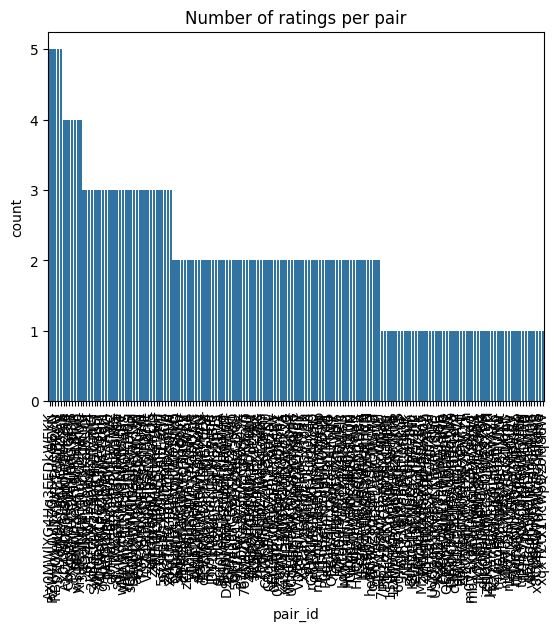

In [6]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.barplot(df_ratings_count_computed, x="pair_id", y="count")
plt.xticks(rotation=90)
plt.title("Number of ratings per pair")
plt.show()

In [7]:
# Check what percentage of pairs has been covered once
print(f"{df_ratings_count_computed.shape[0]}/{pairs.shape[0]} pairs have been covered. Thats {round(df_ratings_count_computed.shape[0] / pairs.shape[0] * 100, 2)}%.")

176/189 pairs have been covered. Thats 93.12%.


In [8]:
# sanity check from ratings side if all n_ratings are actually covered by actual ratings
for idx, row in pairs.iterrows():
    if row["n_ratings"] >= 1:
        if id in ratings_count_computed:
            if not (ratings_count_computed[id] == row["n_ratings"]):
                print(f"Error! pair \"{row['id']}\" had different n_ratings than actual rating entities {row['n_ratings']} != {ratings_count_computed[id]}")
        else:
            print(f"Error! pair \"{row['id']}\" had different n_ratings than actual rating entities {row['n_ratings']} != {0}")

Error! pair "0Qbwb7Lis9pOLUVOSIrO" had different n_ratings than actual rating entities 2 != 0
Error! pair "0YwyBZxWsQpHsGv8LS61" had different n_ratings than actual rating entities 2 != 0
Error! pair "0bIsWmiOeRXEyKdMrHB1" had different n_ratings than actual rating entities 2 != 0
Error! pair "0uSshiYpzXHdIn1okZsk" had different n_ratings than actual rating entities 4 != 0
Error! pair "1DMpSYJYgWlOR38X57hm" had different n_ratings than actual rating entities 1 != 0
Error! pair "1SUpmaSAQQNMdD8FibPB" had different n_ratings than actual rating entities 1 != 0
Error! pair "1njZxACnAGt6T5qLMRlL" had different n_ratings than actual rating entities 1 != 0
Error! pair "29sPSf4gbZUmlbkLou5s" had different n_ratings than actual rating entities 2 != 0
Error! pair "2kRptcQx5PSo54pmymCi" had different n_ratings than actual rating entities 3 != 0
Error! pair "2yLwlpCr3EttnrWODivG" had different n_ratings than actual rating entities 2 != 0
Error! pair "3BPbSeLlA1pP4U3oOUfy" had different n_ratings t

In [9]:
# sanity check to see if ratings and n_ratings actually match up
for pair_id, n_ratings in ratings_count_computed.items():
    pair = pairs[pairs["id"] == pair_id]
    if pair.shape[0] != 1:
        print(f'ERROR: pair "{pair_id}" occurs "{pair.shape[0]}" times')
    db_n_ratings = pair["n_ratings"].values[0]
    if n_ratings != db_n_ratings:
        print(
            f'ERROR: pair "{pair_id}" has {n_ratings} but ratings tracker only has {db_n_ratings}'
        )

### How many ratings per user?

In [10]:
ratings_per_user = ratings.groupby("user_id")["id"].count()
df_ratings_per_user = pd.DataFrame.from_dict(
    {"user_id": ratings_per_user.index, "count": ratings_per_user.values}
).sort_values("count", ascending=False)
df_ratings_per_user

,user_id,count
41,d8033277-b91a-4a77-8a57-77b042e1497d,31
35,ba42e8c9-68c7-4fcf-af39-5e18ca1aa5bb,26
3,0a665c40-da19-49db-ad71-f87e7af9c0d8,23
14,4ade5517-3297-49b4-a1e7-a76ae38a8327,19
10,3b6c78e7-b0e6-4c75-a3f3-e1dccc7c9361,14
7,2da877e8-1b4b-4f78-a04d-3be1f9765bc6,14
11,3edd6ae6-6c05-4db2-9b40-f9a22b3e5f8e,12
15,4dc54225-0f2f-40ce-8ed5-1b18cb929d29,12
24,821c56bf-fd47-45ff-b44d-0496db475dc1,8
1,01484c3c-2a33-4b20-83b2-27d3abd202f1,6


In [11]:
df_ratings_per_user.shape

(50, 2)

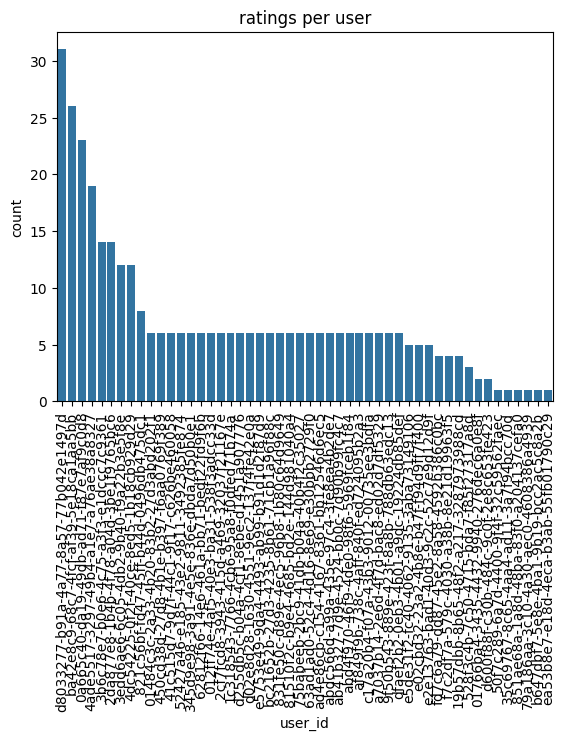

In [12]:
sns.barplot(df_ratings_per_user, x="user_id", y="count")
plt.xticks(rotation=90)
plt.title("ratings per user")
plt.show()

### How many times has every individual model been rated?

In [13]:
rating_records = []

for idx, row in ratings.iterrows():
    pair = pairs[row["pair_id"] == pairs["id"]].iloc[0]
    rating_records.append(
        {
            "model_name": str(pair["model_1"])
            .replace("splats/", "")
            .replace(".ksplat", ""),
            "preferred": row["rating"] == "first",
            "user_id": row["user_id"],
        }
    )
    rating_records.append(
        {
            "model_name": str(pair["model_2"])
            .replace("splats/", "")
            .replace(".ksplat", ""),
            "preferred": row["rating"] == "second",
            "user_id": row["user_id"],
        }
    )

df_ratings_per_model = pd.DataFrame.from_records(rating_records)
df_ratings_per_model

,model_name,preferred,user_id
0,eagles-room-medium-1,True,ad4e86cb-c154-4167-8361-bb12546d6ec5
1,gaussian_pro-room-medium-1,False,ad4e86cb-c154-4167-8361-bb12546d6ec5
2,eagles-truck-medium-1,True,d8033277-b91a-4a77-8a57-77b042e1497d
3,geo_gaussian-truck-medium-1,False,d8033277-b91a-4a77-8a57-77b042e1497d
4,default-room-medium-1,True,831fe50c-d89e-4ec5-96b8-1b80c64d9649
...,...,...,...
705,gaussian_pro-stump-high-1,False,e2e13763-bad1-40d3-9c2c-52c7e9d12d9f
706,mini_splatting-stump-medium-1,True,4ade5517-3297-49b4-a1e7-a76ae38a8327
707,eagles-stump-medium-1,False,4ade5517-3297-49b4-a1e7-a76ae38a8327
708,eagles-room-high-1,False,c17a20b4-f07a-43b3-9012-00735ee3bdfa


In [14]:
count_ratings_per_model = df_ratings_per_model.groupby("model_name")["model_name"].count()
df_count_ratings_per_model = pd.DataFrame.from_dict({
    "model_name": count_ratings_per_model.index,
    "n_ratings": count_ratings_per_model.values,
}).sort_values("n_ratings", ascending=False)
df_count_ratings_per_model

,model_name,n_ratings
0,default-room-high-1,18
14,eagles-stump-medium-1,18
52,mini_splatting-truck-low-1,17
23,gaussian_pro-stump-medium-1,16
27,geo_gaussian-room-high-1,16
...,...,...
37,mcmc-room-low-1,8
38,mcmc-room-medium-1,8
6,default-truck-high-1,7
30,geo_gaussian-stump-high-1,7


### Whats the just objectionable difference (JOD) for each dataset/approach/size?

In [15]:
from typing import NamedTuple
import numpy as np
from scipy.optimize import minimize
from scipy.stats import norm
from matplotlib import pyplot as plt


index = {
    "default": 0,
    "mcmc": 1,
    "mini_splatting": 2,
    "eagles": 3,
    "mip_splatting": 4,
    "gaussian_pro": 5,
    "geo_gaussian": 6,
}


def create_preference_matrix_from_df(df: pd.DataFrame) -> np.ndarray:
    preferences = np.zeros((7, 7), dtype=np.uint)

    for _, rating in df.iterrows():
        if rating["rating"] == "first":
            preferences[index[rating["technique_1"]]][index[rating["technique_2"]]] = (
                preferences[index[rating["technique_1"]]][index[rating["technique_2"]]]
                + 1
            )
        if rating["rating"] == "second":
            preferences[index[rating["technique_2"]]][index[rating["technique_1"]]] = (
                preferences[index[rating["technique_2"]]][index[rating["technique_1"]]]
                + 1
            )

    return preferences


# Function to calculate log-likelihood
def thurstone_log_likelihood(mu: np.ndarray, C: np.ndarray) -> float:
    n = len(mu)
    log_likelihood = 0
    for i in range(n):
        for j in range(n):
            if i != j:
                p_ij = norm.cdf((mu[i] - mu[j]) / np.sqrt(2))
                log_likelihood += C[i, j] * np.log(
                    p_ij + 1e-9
                )  # Add a small value to avoid log(0)
    return -log_likelihood


class JodResults(NamedTuple):
    default: float
    mcmc: float
    mini_splatting: float
    eagles: float
    mip_splatting: float
    gaussian_pro: float
    geo_gaussian: float

    def to_array(self) -> np.ndarray:
        return np.array(
            [
                self.default,
                self.mcmc,
                self.mini_splatting,
                self.eagles,
                self.mip_splatting,
                self.gaussian_pro,
                self.geo_gaussian,
            ]
        )


def compute_jod(preferences: np.ndarray) -> JodResults:
    # Initial guess for latent qualities
    n_stimuli = preferences.shape[0]
    mu_init = np.zeros(n_stimuli)

    # Optimize latent scores
    result = minimize(
        thurstone_log_likelihood, mu_init, args=(preferences,), method="BFGS"
    )
    [
        default,
        mcmc,
        mini_splatting,
        eagles,
        mip_splatting,
        gaussian_pro,
        geo_gaussian,
    ] = result.x

    return JodResults(
        default,
        mcmc,
        mini_splatting,
        eagles,
        mip_splatting,
        gaussian_pro,
        geo_gaussian,
    )


def plot_jod_full() -> pd.DataFrame:
    _, axs = plt.subplots(3, 3, sharex=True, sharey=True)

    records = []

    for i, size in enumerate(["low", "medium", "high"]):
        for j, dataset in enumerate(["room", "stump", "truck"]):
            current_ratings = ratings[
                (ratings["size"] == size) & (ratings["dataset"] == dataset)
            ]
            preferences = create_preference_matrix_from_df(current_ratings)
            jod_results = compute_jod(preferences)

            axs[i][j].bar(index.keys(), jod_results.to_array())
            if i == 2:
                axs[i][j].tick_params(labelrotation=90)
                plt.setp(axs[i, j], xlabel=dataset)

            if j == 0:
                plt.setp(axs[i, 0], ylabel=size)

            records.append(
                {
                    "size": size,
                    "dataset": dataset,
                    "default": jod_results.default,
                    "mcmc": jod_results.mcmc,
                    "mini_splatting": jod_results.mini_splatting,
                    "eagles": jod_results.eagles,
                    "mip_splatting": jod_results.mip_splatting,
                    "gaussian_pro": jod_results.gaussian_pro,
                    "geo_gaussian": jod_results.geo_gaussian,
                }
            )

    plt.tight_layout()
    plt.show()

    return pd.DataFrame.from_records(records)

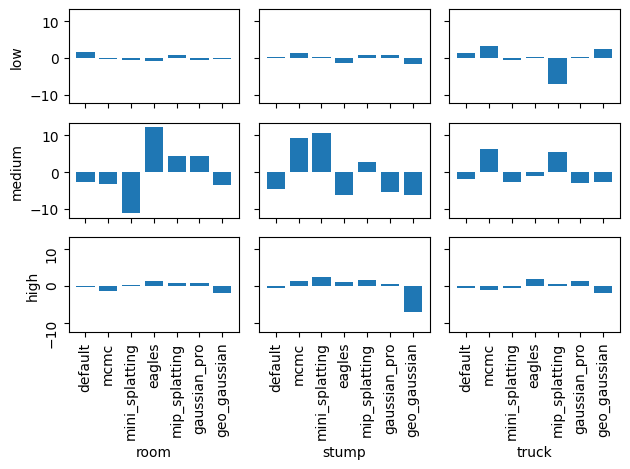

In [16]:
df_jod_full = plot_jod_full()

In [17]:
df_jod_full.to_excel("jod.xlsx")

## Whats the JOD over time as more ratings come in?

In [18]:
def compute_jod_batched(batch_size: int) -> pd.DataFrame:
    records = []

    for i, size in enumerate(["low", "medium", "high"]):
        for j, dataset in enumerate(["room", "stump", "truck"]):
            current_ratings = ratings[
                (ratings["size"] == size) & (ratings["dataset"] == dataset)
            ].sort_values("timestamp", na_position="first")

            batches = [current_ratings[pd.isna(current_ratings["timestamp"])]]

            len_na = pd.isna(current_ratings["timestamp"]).sum()
            len_non_na = pd.notna(current_ratings["timestamp"]).sum()
            for i in range(0, len_non_na, batch_size):
                batches.append(
                    current_ratings.iloc[
                        0:(len_na + min(len_non_na, i + batch_size))
                    ]
                )

            for batch_idx, batch in enumerate(batches):
                preferences = create_preference_matrix_from_df(batch)
                jod_results = compute_jod(preferences)

                records.append(
                    {
                        "size": size,
                        "dataset": dataset,
                        "batch_idx": batch_idx,
                        "default": jod_results.default,
                        "mcmc": jod_results.mcmc,
                        "mini_splatting": jod_results.mini_splatting,
                        "eagles": jod_results.eagles,
                        "mip_splatting": jod_results.mip_splatting,
                        "gaussian_pro": jod_results.gaussian_pro,
                        "geo_gaussian": jod_results.geo_gaussian,
                    }
                )

    return pd.DataFrame.from_records(records)

In [19]:
#df_jod_batched_10 = compute_jod_batched(10)


In [20]:
#df_jod_batched_5 = compute_jod_batched(5)

In [21]:
df_jod_batched_3 = compute_jod_batched(3)

In [22]:
#df_jod_batched_20 = compute_jod_batched(20)

In [23]:
def plot_jod_batched(df_batched: pd.DataFrame) -> None:
    _, axs = plt.subplots(3, 3, sharex=True, sharey=True)
    lines = []
    columns = ["default", "mcmc","mini_splatting",	"eagles", "mip_splatting", "gaussian_pro", "geo_gaussian"]
    for i, size in enumerate(["low", "medium", "high"]):
        for j, dataset in enumerate(["room", "stump", "truck"]):
            current = df_batched[
                (df_batched["size"] == size) & (df_batched["dataset"] == dataset)
            ]
            for col in columns:
                line, = axs[i][j].plot(current["batch_idx"], current[col])
                if i == 0 and j == 0:
                    lines.append(line)
            
            if i == 2:
                axs[i][j].tick_params(labelrotation=90)
                plt.setp(axs[-1, j], xlabel=dataset)
            else:
                pass
                # axs[i][j].set_xticks(["" for _ in range(len(current))])

            if j == 0:
                plt.setp(axs[i, 0], ylabel=size)

    plt.tight_layout()
    axs[1, 2].legend(lines, columns, loc="center left", bbox_to_anchor=(1, 0.5))
    plt.show()

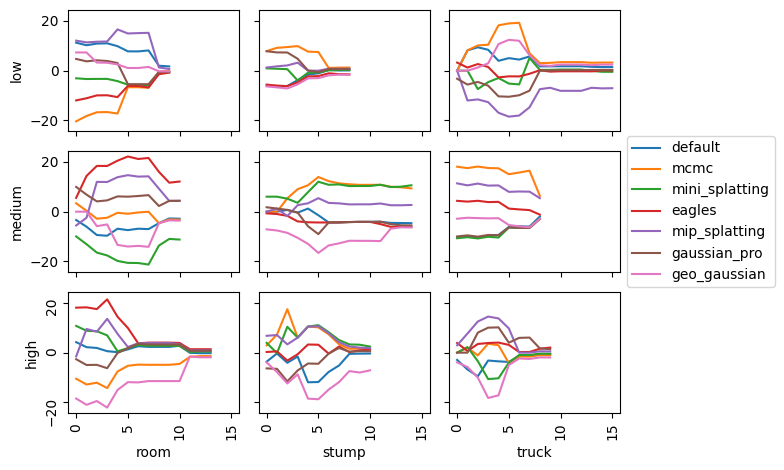

In [24]:
plot_jod_batched(df_jod_batched_3)

## Which dataset+size combination has been rated the least?

In [25]:
df_ratings_count = ratings.groupby(["dataset", "size"])["id"].count().reset_index().sort_values("id")
df_ratings_count

,dataset,size,id
6,truck,high,33
2,room,medium,34
1,room,low,35
4,stump,low,36
3,stump,high,37
8,truck,medium,39
7,truck,low,46
5,stump,medium,46
0,room,high,49


## How stable is the JOD when cross-validating?

In [26]:
from typing import Tuple
import numpy as np
import multiprocessing as mp
from sklearn.model_selection import KFold
import itertools


def cross_validate_jod_for_circumstance(tup: Tuple[int, Tuple[str, str]]) -> np.ndarray:
    k_folds, (size, dataset) = tup
    current = ratings[(ratings["size"] == size) & (ratings["dataset"] == dataset)]
    kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
    jod_estimates = []

    for fold_idx, (train_idx, test_idx) in enumerate(kf.split(current)):
        train_data = current.iloc[train_idx]
        preferences = create_preference_matrix_from_df(train_data)
        jod_results = compute_jod(preferences)
        jod_estimates.append((fold_idx, jod_results))

    return size, dataset, jod_estimates


def compute_k_fold_cross_validation(k_folds: int) -> pd.DataFrame:
    num_workers = min(mp.cpu_count() - 1, 9)
    circumstances = list(
        itertools.product(["low", "medium", "high"], ["room", "stump", "truck"])
    )
    with mp.Pool(num_workers) as pool:
        results = pool.map(
            cross_validate_jod_for_circumstance,
            zip(
                [10 for _ in range(len(circumstances))],
                circumstances,
            ),
        )

    records = []

    for size, dataset, jod_estimates in results:
        for fold_idx, jod_results in jod_estimates:
            records.append(
                {
                    "size": size,
                    "dataset": dataset,
                    "fold_idx": fold_idx,
                    "default": jod_results.default,
                    "mcmc": jod_results.mcmc,
                    "mini_splatting": jod_results.mini_splatting,
                    "eagles": jod_results.eagles,
                    "mip_splatting": jod_results.mip_splatting,
                    "gaussian_pro": jod_results.gaussian_pro,
                    "geo_gaussian": jod_results.geo_gaussian,
                }
            )

    return pd.DataFrame.from_records(records)


result = compute_k_fold_cross_validation(10)

In [27]:
result.groupby(["size", "dataset"]).agg(["std"])

fold_idx   default      mcmc mini_splatting    eagles  \
                    std       std       std            std       std   
size   dataset                                                         
high   room     3.02765  0.942549  0.923141       0.869597  0.661146   
       stump    3.02765  1.455362  0.670207       0.645545  0.805788   
       truck    3.02765  1.087498  1.359990       1.079249  3.399732   
low    room     3.02765  1.496294  0.321914       0.250555  0.393679   
       stump    3.02765  0.601402  0.551642       0.537092  1.388253   
       truck    3.02765  2.106411  3.575598       2.366892  0.783110   
medium room     3.02765  2.008118  3.582593       3.337070  2.589253   
       stump    3.02765  0.860392  1.122512       1.852074  1.770711   
       truck    3.02765  0.994147  1.948123       0.896629  1.174570   

               mip_splatting gaussian_pro geo_gaussian  
                         std          std          std  
size   dataset                                          
high   room         0.913076     0.680594     2.992104  
       stump        0.542755     0.530361     1.380825  
       truck        1.714851     1.358771     1.722332  
low    room         0.463938     0.406203     0.247447  
       stump        0.559192     0.646376     1.140570  
       truck        2.229300     1.061171     1.893907  
medium room         2.613978     2.486583     2.796311  
       stump        1.220677     1.581971     1.606168  
       truck        1.253874     0.975858     0.641543

<Axes: xlabel='None-None', ylabel='size-dataset'>

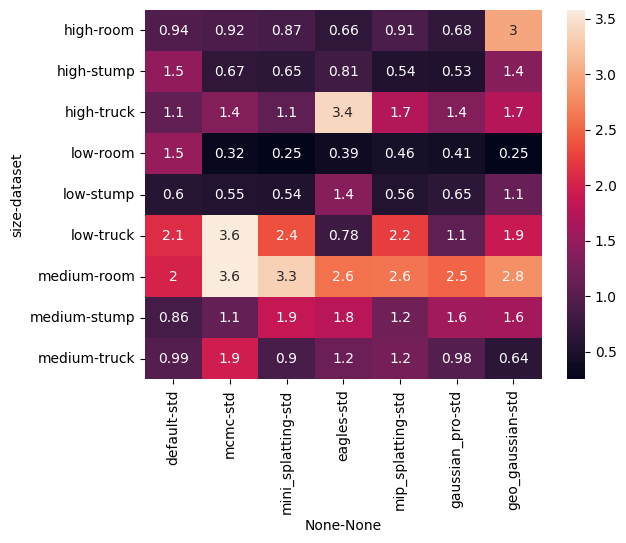

In [28]:
sns.heatmap(
    result.groupby(["size", "dataset"])
    .agg(["std"])[
        [
            "default",
            "mcmc",
            "mini_splatting",
            "eagles",
            "mip_splatting",
            "gaussian_pro",
            "geo_gaussian",
        ]
    ]
    .apply(lambda x: round(x, 2)),
    annot=True,
)

## How stable is the ranking according to the JOD across all the different circustances and models?

In [29]:
# overall rank stability
ranks = result[
    [
        "default",
        "mcmc",
        "mini_splatting",
        "eagles",
        "mip_splatting",
        "gaussian_pro",
        "geo_gaussian",
    ]
].rank(axis=1, ascending=False)

rank_counts = ranks.apply(pd.Series.value_counts, axis=0).fillna(0)
df_rank_overall = (rank_counts / ranks.shape[0] * 100).apply(round)

<Axes: >

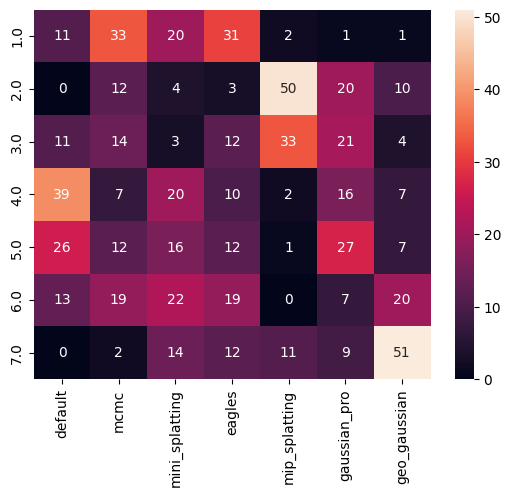

In [30]:
import seaborn as sns

sns.heatmap(df_rank_overall, annot=True)

In [31]:
def compute_rank_consistency(df_jod_cv: pd.DataFrame) -> pd.DataFrame:
    records = []

    for size in ["low", "medium", "high"]:
        for dataset in ["room", "stump", "truck"]:
            current = df_jod_cv[
                (df_jod_cv["size"] == size) & (df_jod_cv["dataset"] == dataset)
            ]
            ranks = current[
                [
                    "default",
                    "mcmc",
                    "mini_splatting",
                    "eagles",
                    "mip_splatting",
                    "gaussian_pro",
                    "geo_gaussian",
                ]
            ].rank(axis=1, ascending=False)
            rank_counts = ranks.apply(pd.Series.value_counts, axis=0).fillna(0)
            best_rank = (rank_counts.max(axis=0) / ranks.shape[0] * 100).apply(round)
            (
                default,
                mcmc,
                mini_splatting,
                eagles,
                mip_splatting,
                gaussian_pro,
                geo_gaussian,
            ) = best_rank.values
            records.append(
                {
                    "size": size,
                    "dataset": dataset,
                    "default": default,
                    "mcmc": mcmc,
                    "mini_splatting": mini_splatting,
                    "eagles": eagles,
                    "mip_splatting": mip_splatting,
                    "gaussian_pro": gaussian_pro,
                    "geo_gaussian": geo_gaussian,
                }
            )
    return pd.DataFrame.from_records(records)

# Rank consistency per circumstance
rank_consistency = compute_rank_consistency(result).set_index(["size", "dataset"])
rank_consistency

default  mcmc  mini_splatting  eagles  mip_splatting  \
size   dataset                                                         
low    room         100    60              50      70            100   
       stump         80   100              60      80             50   
       truck        100    90              80      60            100   
medium room          80    80             100     100             60   
       stump        100    90              90      70            100   
       truck         90   100              60     100            100   
high   room         100    80              80      90             60   
       stump         90    70              90      70             70   
       truck         60    70              50      90             80   

                gaussian_pro  geo_gaussian  
size   dataset                              
low    room               40            50  
       stump              50            80  
       truck              80            90  
medium room               60            80  
       stump              90            80  
       truck              70            50  
high   room               70            80  
       stump              80           100  
       truck              80           100

In [32]:
df_ratings_per_model["model"] = df_ratings_per_model["model_name"].apply(
    lambda name: name.split("-")[0]
)
df_ratings_per_model["dataset"] = df_ratings_per_model["model_name"].apply(
    lambda name: name.split("-")[1]
)
df_ratings_per_model["size"] = df_ratings_per_model["model_name"].apply(
    lambda name: name.split("-")[2]
)
df_ratings_per_model
# df_grouped["n_splats"] = df_grouped["size"].apply(
#     lambda size: {
#         "low": 117856,
#         "medium": 412235,
#         "high": 1093135,
#         "extended": 2186270,
#     }[size]
# )
# df_grouped

,model_name,preferred,user_id,model,dataset,size
0,eagles-room-medium-1,True,ad4e86cb-c154-4167-8361-bb12546d6ec5,eagles,room,medium
1,gaussian_pro-room-medium-1,False,ad4e86cb-c154-4167-8361-bb12546d6ec5,gaussian_pro,room,medium
2,eagles-truck-medium-1,True,d8033277-b91a-4a77-8a57-77b042e1497d,eagles,truck,medium
3,geo_gaussian-truck-medium-1,False,d8033277-b91a-4a77-8a57-77b042e1497d,geo_gaussian,truck,medium
4,default-room-medium-1,True,831fe50c-d89e-4ec5-96b8-1b80c64d9649,default,room,medium
...,...,...,...,...,...,...
705,gaussian_pro-stump-high-1,False,e2e13763-bad1-40d3-9c2c-52c7e9d12d9f,gaussian_pro,stump,high
706,mini_splatting-stump-medium-1,True,4ade5517-3297-49b4-a1e7-a76ae38a8327,mini_splatting,stump,medium
707,eagles-stump-medium-1,False,4ade5517-3297-49b4-a1e7-a76ae38a8327,eagles,stump,medium
708,eagles-room-high-1,False,c17a20b4-f07a-43b3-9012-00735ee3bdfa,eagles,room,high


<Axes: ylabel='size-dataset'>

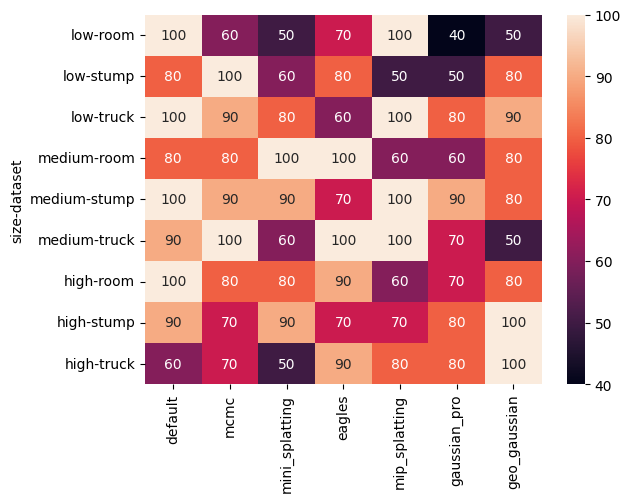

In [33]:
sns.heatmap(rank_consistency, annot=True, fmt = ".3g")

NameError: name 'df_grouped' is not defined

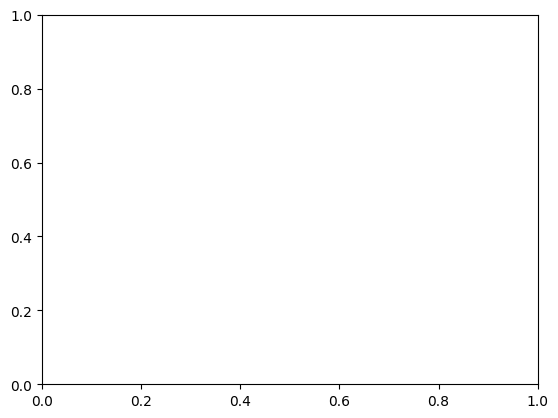

In [ ]:
ax = plt.subplot()
sns.lineplot(df_grouped, x="n_splats", y="rating", hue="model", ax=ax)
plt.title("MOS per splat budget (Truck dataset)")
ax.set_xticks([117856, 412235, 1093135, 2186270], ["low", "medium", "high", "extended"])
plt.show()

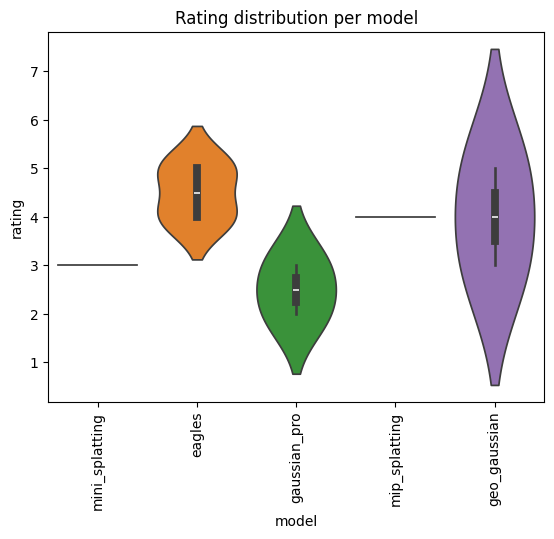

In [ ]:
sns.violinplot(df_ratings_truck, x="model", y="rating", hue="model")
plt.title("Rating distribution per model")
plt.xticks(rotation=90)
plt.show()